# EDA

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from statsmodels.stats import weightstats as stests

In [223]:
# Load Autism Data
%store -r autism_data
%store -r ASD_Ethnicity_df
%store -r ASD_gender_df

## Approach

Bar graph proportions of ethnicity and gender
Graph correlation color with score
Compare via z-test

## Visualization

Text(0.5,1,'Percentage of Ethnicities with ASD')

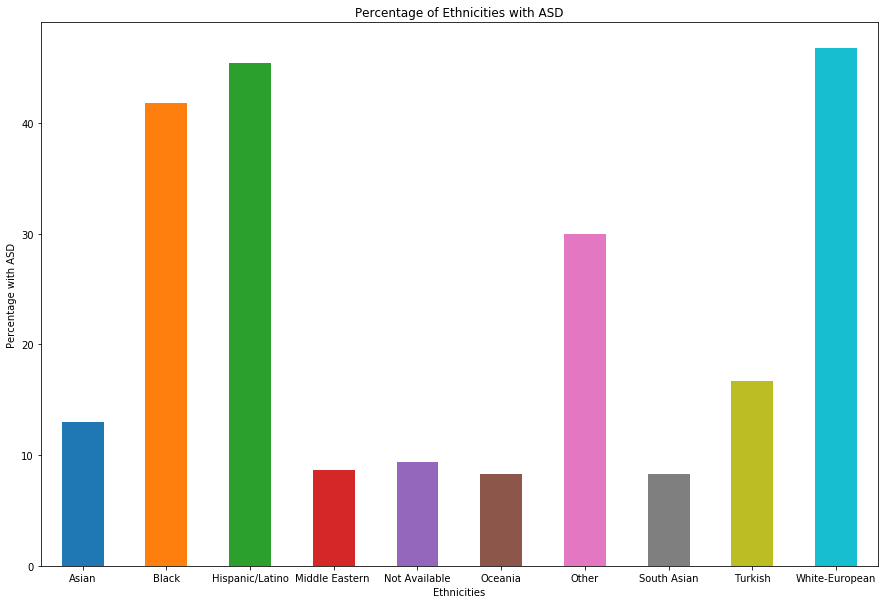

In [224]:
# Graph Percent Ethnicity
ax = ASD_Ethnicity_df.plot.bar(x='Ethnicity', y='Percentage with Autism', rot=0,figsize=(15, 10), legend=None)
ax.set_xlabel('Ethnicities')
ax.set_ylabel('Percentage with ASD')
ax.set_title('Percentage of Ethnicities with ASD')

Text(0.5,1,'Percentage Composition of Ethnicities')

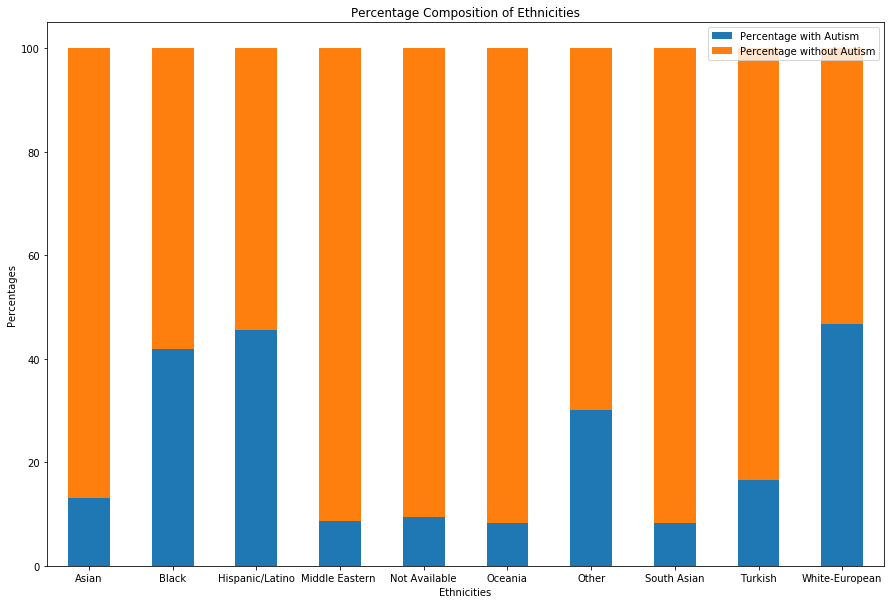

In [243]:
# Stacked Bar Ethnicity
ASD_Ethnicity_df_percentage = ASD_Ethnicity_df[['Ethnicity','Percentage with Autism','Percentage without Autism']]
ax = ASD_Ethnicity_df_percentage.plot.bar(x='Ethnicity', stacked=True, rot=0,figsize=(15, 10))
ax.set_xlabel('Ethnicities')
ax.set_ylabel('Percentages')
ax.set_title('Percentage Composition of Ethnicities')

Text(0.5,1,'Percentage of Gender with ASD')

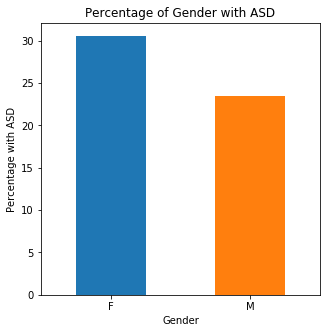

In [226]:
# Graph Percent Gender
ax = ASD_gender_df.plot.bar(x='Gender', y='Percentage with Autism', rot=0,figsize=(5, 5), legend=None)
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage with ASD')
ax.set_title('Percentage of Gender with ASD')

Text(0.5,1,'Percentage Composition of Gender')

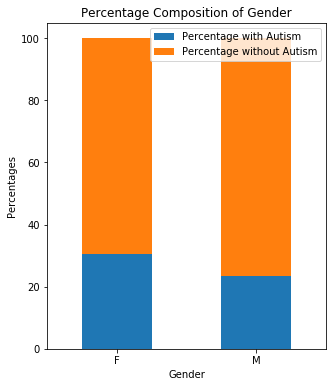

In [247]:
# Stacked Bar Gender
ASD_gender_df_percentage = ASD_gender_df[['Gender','Percentage with Autism','Percentage without Autism']]
ax = ASD_gender_df_percentage.plot.bar(x='Gender', stacked=True, rot=0,figsize=(5, 6))
ax.set_xlabel('Gender')
ax.set_ylabel('Percentages')
ax.set_title('Percentage Composition of Gender')

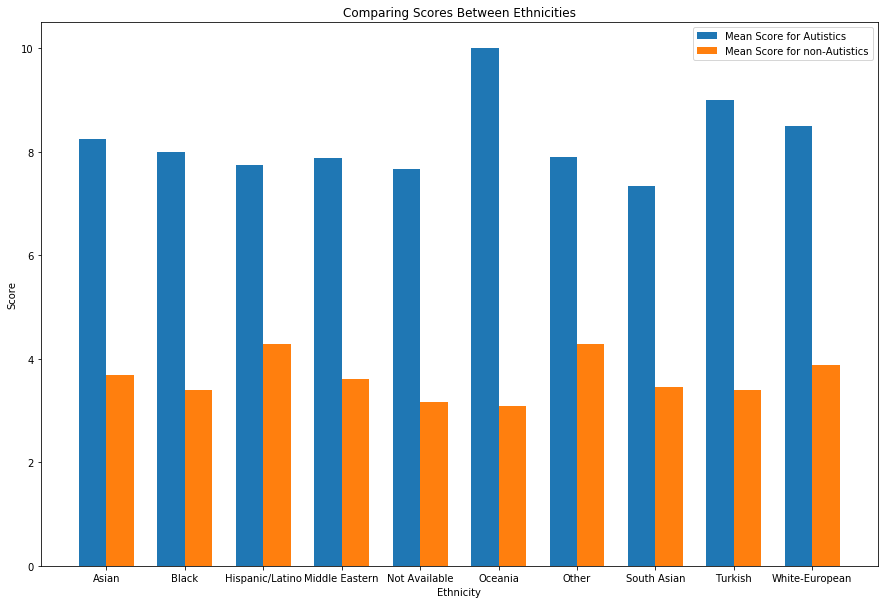

In [249]:
# Graph Mean Score Ethnicity

index = np.arange(10)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15,10))
ethnicity_score_autism_y = ax.bar(index,
                                  ASD_Ethnicity_df["Mean Autism Score for People with Autism"],
                                  bar_width, label="Mean Score for Autistics")
ethnicity_score_autism_n = ax.bar(index+bar_width,
                                  ASD_Ethnicity_df["Mean Autism Score for People without Autism"],
                                  bar_width, label="Mean Score for non-Autistics")
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Score')
ax.set_title('Comparing Scores Between Ethnicities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Asian','Black','Hispanic/Latino','Middle Eastern',"Not Available","Oceania","Other","South Asian","Turkish",'White-European'])
ax.legend()
plt.show()

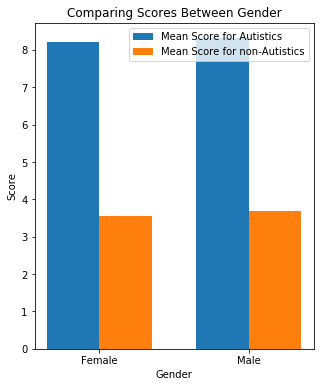

In [248]:
# Graph Scores Gender
index = np.arange(2)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(5,6))
gender_score_autism_y = ax.bar(index,
                                  ASD_gender_df["Mean Autism Score for People with Autism"],
                                  bar_width, label="Mean Score for Autistics")
gender_score_autism_n = ax.bar(index+bar_width,
                                  ASD_gender_df["Mean Autism Score for People without Autism"],
                                  bar_width, label="Mean Score for non-Autistics")
ax.set_xlabel('Gender',)
ax.set_ylabel('Score')
ax.set_title('Comparing Scores Between Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Female','Male'])
ax.legend()
plt.show()

## Descriptive Statistical Analysis

### Autism Data

In [235]:
autism_data['Result'].describe()

count    704.000000
mean       4.875000
std        2.501493
min        0.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: Result, dtype: float64

### Gender

In [413]:
ASD_gender_df

,Gender,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
0,F,30.563798,69.436202,103,234,337,8.223301,3.559829,4.985163
1,M,23.433243,76.566757,86,281,367,8.313953,3.690391,4.773842


In [418]:
new_gender = ASD_gender_df.T
new_gender

,0,1
Gender,F,M
Percentage with Autism,30.5638,23.4332
Percentage without Autism,69.4362,76.5668
Number of People with Autism,103,86
Number of People without Autism,234,281
Total Number of People,337,367
Mean Autism Score for People with Autism,8.2233,8.31395
Mean Autism Score for People without Autism,3.55983,3.69039
Mean Autism Score for All People,4.98516,4.77384


In [388]:
ASD_gender_df.describe()

,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,26.998520,73.001480,94.500000,257.500000,352.000000,8.268627,3.625110,4.879503
std,5.042064,5.042064,12.020815,33.234019,21.213203,0.064101,0.092322,0.149427
min,23.433243,69.436202,86.000000,234.000000,337.000000,8.223301,3.559829,4.773842
25%,25.215881,71.218841,90.250000,245.750000,344.500000,8.245964,3.592470,4.826672
50%,26.998520,73.001480,94.500000,257.500000,352.000000,8.268627,3.625110,4.879503
75%,28.781159,74.784119,98.750000,269.250000,359.500000,8.291290,3.657751,4.932333
max,30.563798,76.566757,103.000000,281.000000,367.000000,8.313953,3.690391,4.985163


In [393]:
autism_data.groupby(by=['Gender','ASD'])['ASD'].count()

Gender  ASD
F       NO     234
        YES    103
M       NO     281
        YES     86
Name: ASD, dtype: int64

In [396]:
autism_data.groupby(by=['Gender', 'ASD'])['Result'].mean()

Gender  ASD
F       NO     3.559829
        YES    8.223301
M       NO     3.690391
        YES    8.313953
Name: Result, dtype: float64

### Ethnicity

In [255]:
ASD_Ethnicity_df

,Ethnicity,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
0,Asian,13.008130,86.991870,16,107,123,8.250000,3.682243,4.276423
1,Black,41.860465,58.139535,18,25,43,8.000000,3.400000,5.325581
2,Hispanic/Latino,45.454545,54.545455,15,18,33,7.733333,4.277778,5.848485
3,Middle Eastern,8.695652,91.304348,8,84,92,7.875000,3.607143,3.978261
4,Not Available,9.375000,90.625000,9,87,96,7.666667,3.172414,3.593750
5,Oceania,8.333333,91.666667,1,11,12,10.000000,3.090909,3.666667
6,Other,30.000000,70.000000,9,21,30,7.888889,4.285714,5.366667
7,South Asian,8.333333,91.666667,3,33,36,7.333333,3.454545,3.777778
8,Turkish,16.666667,83.333333,1,5,6,9.000000,3.400000,4.333333
9,White-European,46.781116,53.218884,109,124,233,8.495413,3.870968,6.034335


In [419]:
new_ethnicity = ASD_Ethnicity_df.T
new_ethnicity

,0,1,2,3,4,5,6,7,8,9
Ethnicity,Asian,Black,Hispanic/Latino,Middle Eastern,Not Available,Oceania,Other,South Asian,Turkish,White-European
Percentage with Autism,13.0081,41.8605,45.4545,8.69565,9.375,8.33333,30,8.33333,16.6667,46.7811
Percentage without Autism,86.9919,58.1395,54.5455,91.3043,90.625,91.6667,70,91.6667,83.3333,53.2189
Number of People with Autism,16,18,15,8,9,1,9,3,1,109
Number of People without Autism,107,25,18,84,87,11,21,33,5,124
Total Number of People,123,43,33,92,96,12,30,36,6,233
Mean Autism Score for People with Autism,8.25,8,7.73333,7.875,7.66667,10,7.88889,7.33333,9,8.49541
Mean Autism Score for People without Autism,3.68224,3.4,4.27778,3.60714,3.17241,3.09091,4.28571,3.45455,3.4,3.87097
Mean Autism Score for All People,4.27642,5.32558,5.84848,3.97826,3.59375,3.66667,5.36667,3.77778,4.33333,6.03433


In [387]:
ASD_Ethnicity_df.describe()

,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,22.850824,77.149176,18.900000,51.500000,70.400000,8.224264,3.624171,4.620128
std,16.447453,16.447453,32.233351,44.161949,69.001127,0.778862,0.414614,0.933827
min,8.333333,53.218884,1.000000,5.000000,6.000000,7.333333,3.090909,3.593750
25%,8.865489,61.104651,4.250000,18.750000,30.750000,7.768750,3.400000,3.827899
50%,14.837398,85.162602,9.000000,29.000000,39.500000,7.944444,3.530844,4.304878
75%,38.895349,91.134511,15.750000,86.250000,95.000000,8.434060,3.823787,5.356395
max,46.781116,91.666667,109.000000,124.000000,233.000000,10.000000,4.285714,6.034335


In [257]:
autism_data.groupby(by=['Ethnicity','ASD'])['ASD'].count()

Ethnicity        ASD
Asian            NO     107
                 YES     16
Black            NO      25
                 YES     18
Hispanic/Latino  NO      18
                 YES     15
Middle Eastern   NO      84
                 YES      8
Not Available    NO      87
                 YES      9
Oceania          NO      11
                 YES      1
Other            NO      21
                 YES      9
South Asian      NO      33
                 YES      3
Turkish          NO       5
                 YES      1
White-European   NO     124
                 YES    109
Name: ASD, dtype: int64

In [231]:
autism_data.groupby(by=['Ethnicity', 'ASD'])['Result'].mean()

Ethnicity        ASD
Asian            NO      3.682243
                 YES     8.250000
Black            NO      3.400000
                 YES     8.000000
Hispanic/Latino  NO      4.277778
                 YES     7.733333
Middle Eastern   NO      3.607143
                 YES     7.875000
Not Available    NO      3.172414
                 YES     7.666667
Oceania          NO      3.090909
                 YES    10.000000
Other            NO      4.285714
                 YES     7.888889
South Asian      NO      3.454545
                 YES     7.333333
Turkish          NO      3.400000
                 YES     9.000000
White-European   NO      3.870968
                 YES     8.495413
Name: Result, dtype: float64

## Inferential Statistical Analysis

### Gender Statistical Test

#### Gender Proportion Test

In [265]:
# Create Proportions For Gender
male = autism_data[autism_data.Gender=='M']
female = autism_data[autism_data.Gender=='F']

male_yes = len(male[male['ASD']=='YES'])
total_male = len(male.ASD)
male_proportion = male_yes/total_male

female_yes = len(female[female.ASD=='YES'])
total_female = len(female.ASD)
female_proportion = female_yes/total_female

diff_mean = np.abs(male_proportion-female_proportion)
pooled_proportion = (male_yes+female_yes)/(total_male+total_female)

print(female_proportion)
print(male_proportion)

0.3056379821958457
0.23433242506811988


In [422]:
# Z test to find p-value
se = np.sqrt(pooled_proportion * (1-pooled_proportion) * ((1/total_female)+(1/total_male)) )
z_stat = diff_mean / se 
p_val = stats.norm.sf(np.abs(z_stat))*2

print(("{:2.3f}".format(p_val)))

0.033


The P-Value is less than 0.05. Therefore, the data is significantly different and that there is a difference gender proportions with ASD.

#### Gender Score Test

In [267]:
male_score_y = autism_data['Result'][autism_data.ASD=='YES'][autism_data.Gender=='M']
female_score_y = autism_data['Result'][autism_data.ASD=='YES'][autism_data.Gender=='F']

In [424]:
weightedstats.ztest(male_score_y,female_score_y)
ztest ,p_val1 = stests.ztest(male_score_y, x2=female_score_y, value=0,alternative='two-sided')
print(("{:2.3f}".format(p_val1)))

0.558


The P-Value is greater than 0.05. Therefore, the data isn't significantly different and that there is no difference in score between the genders.

### Ethnicity Statistical Tests

#### Ethnicity Proportion Test

In [411]:
print(autism_data.Ethnicity.unique())

['White-European' 'Hispanic/Latino' 'Not Available' 'Other' 'Black'
 'Asian' 'Middle Eastern ' 'Oceania' 'South Asian' 'Turkish']


In [398]:
# All ethnicities
all_ethnicity=[
autism_data[autism_data.Ethnicity=='Asian'],
autism_data[autism_data.Ethnicity=='Black'],
autism_data[autism_data.Ethnicity=='Hispanic/Latino'],
autism_data[autism_data.Ethnicity=='Not Available'],
autism_data[autism_data.Ethnicity=='Oceania'],
autism_data[autism_data.Ethnicity=='Other'],
autism_data[autism_data.Ethnicity=='South Asian'],
autism_data[autism_data.Ethnicity=='Turkish'],
autism_data[autism_data.Ethnicity=='White-European']]

In [425]:
# Compare ethnicity proportion to general population ASD
def Z_test_ethnicities_proportion(x):
    
    # Proportion for each ethnicity
    x_yes = len(x[x['ASD']=='YES'])
    x_total = len(x.ASD)
    x_proportion = x_yes/x_total
    
    # Proportion for general population 
    autism_yes = len(autism_data[autism_data['ASD']=='YES'])
    autism_total = len(autism_data.ASD)
    autism_proportion = autism_yes/autism_total
    
    diff_mean = np.abs(x_proportion-autism_proportion)
    pooled_proportion = (x_yes+autism_yes)/(x_total+autism_total)
    se = np.sqrt(pooled_proportion * (1-pooled_proportion) * ((1/x_total)+(1/autism_total)) )
    
    z_stat = diff_mean / se 
    p_val = stats.norm.sf(np.abs(z_stat))*2
    print((p_val))

In [426]:
for data in all_ethnicity:
    Z_test_ethnicities_proportion(data)

0.0010399212667295328
0.03272339899319689
0.019540582169539415
0.0001983756469397642
0.14978847442130308
0.7031151370880862
0.013447309675724776
0.5748905720065269
1.4835552459400181e-08


When comparing ASD proportions of Oceania, Other and Turkish ethnic groups to the general ASD proportions, the P-Values are greater than 0.05. In contrast, the other ethnic groups have P-values less than 0.05, indicating that they are statistically different.

#### Ethnicity Score Test

In [359]:
# All Scores per Ethnicity
all_scores = [
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Asian'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Black'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Hispanic/Latino'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Not Available'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Oceania'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Other'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='South Asian'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Turkish'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='White-European']]

In [360]:
# Mean Population Score
mean_score = float(autism_data['Result'][autism_data.ASD=='YES'].mean())
mean_score

8.264550264550264

In [351]:
# Z-Test Function for Score
def z_test(data1,x2):
    mean_val = np.mean(data1)
    std_val = np.std(data1)
    se = std_val/np.sqrt(len(data1))
    z_value = (mean_val-x2)/se
    return z_value

In [397]:
#Performing Z_Test
for df in all_scores:
    z_stat = z_test(df,mean_score)
    p_val = stats.norm.sf(np.abs(z_stat))*2
    print("{:2.3f}".format(p_val))

0.955
0.262
0.016
0.007
0.000
0.198
0.001
0.000
0.023


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Among autistics, Oceania and White European scores differ the most from the norm. Their scores are the most different.